# What is an outlier?

    An outlier is a data point in a data set that is distant from all other observations. A data point that lies outside the overall distribution of the dataset.

In [4]:
# !pip install plotly

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

# What is the reason for an outlier to exists in a dataset?

    Variability in the data
    An experimental measurement error

In [6]:
dataset= [25,26,27,28,108,29,30,25,26,27,28,29,30,25,26,109,27,28,29,30,25,26,27,28,110,29,30,25,26,27,28,29,30]

# Various ways of finding the Outlier:

    Using scatter plots
    Box plot
    using z score
    using the IQR interquantile range

# 1. Scatterplots

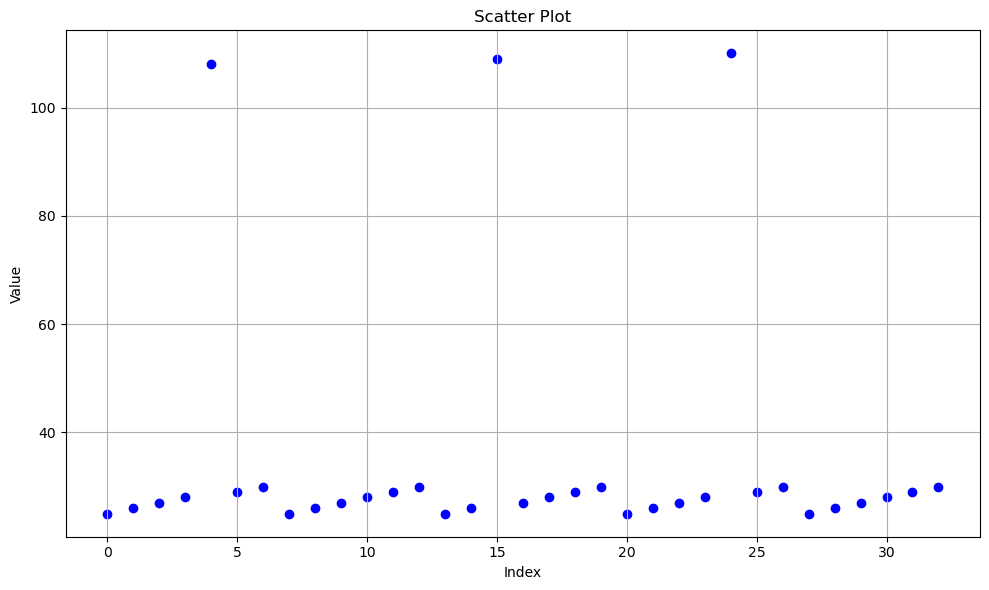

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(dataset)), dataset, color='b', marker='o')
plt.title('Scatter Plot')
plt.xlabel('Index')
plt.ylabel('Value')
plt.tight_layout()
plt.grid()
plt.show()

# 2. Box Plot (Plotly)

In [81]:
df = pd.DataFrame(dataset, columns=["Values"])
fig = px.box(df, y="Values", title="Box Plot", labels={"Values": "Value"})
fig.update_layout(height=800)
fig.show()

# 3. InterQuatileRange (IQR)

75%- 25% values in a dataset

In [82]:
sorted(dataset)
q1, q3= np.percentile(dataset,[25,75])
print(q1,q3)

26.0 29.0


In [83]:
iqr=q3-q1
print(iqr)

3.0


In [84]:
lower = q1 -(1.5 * iqr) 
upper = q3 +(1.5 * iqr) 
print(lower,upper)

21.5 33.5


# 4. Z Score

Z score = (Observation — Mean)/Standard Deviation

In [85]:
outliers=[]
def detect_outliers(data):
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [86]:
outlier_pt=detect_outliers(dataset)
print(outlier_pt)

[108, 109, 110]
